# PHASE 4 PROJECT: GROUP 3

## **Project Title: Time Series Modelling of Real Estate Value**

### **Team Members**
- **Joan Nyamache**
- **Marion Achieng**
- **Eugene Marius**

---

### **Introduction**

Real estate encompasses land, any structures on it, and the natural resources within its boundaries. This sector is pivotal to the economy, offering substantial investment opportunities. Our project aims to assist a real estate development company in constructing residential homes in the United States with favorable returns on investment. By leveraging extensive datasets from Zillow, a leading real estate firm, we will develop a time series model to guide informed investment decisions.

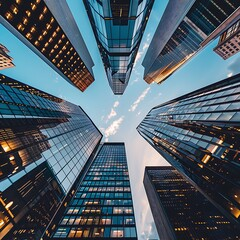
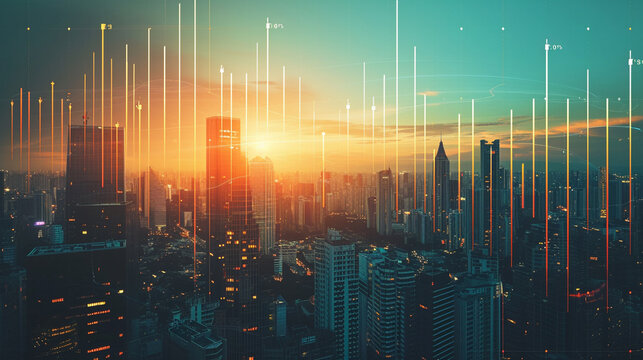

*Figure 1: A visual representation of the real estate market, featuring a city skyline and an overlay of trend graphs. This image symbolizes the analysis of real estate data and trends, reflecting the focus of our time series modeling project.*

---

### **Overview**

Our project involves the following tasks:

1. **Loading the Dataset**: Import historical median house prices from Zillow.
2. **Data Understanding**: Analyze the dataset's structure and content.
3. **Target Variable Identification**: Select key variables for analysis.
4. **Data Preparation**: Clean the data, check for multicollinearity, and ensure data integrity.
5. **Encoding Categorical Variables**: Convert categorical data for modeling.
6. **Model Evaluation**: Evaluate model performance using appropriate metrics.
7. **Prediction**: Forecast future real estate values using trained models.
8. **Insights and Conclusions**: Provide actionable insights and recommendations based on our findings.

---

### **Business Understanding**

Investing in real estate is both dynamic and lucrative, requiring meticulous research and strategic planning. Our stakeholder, a fictional real estate investment company, seeks to identify the top five most promising postal codes (zip codes) for future investments. Utilizing historical data from Zillow, we will analyze trends to highlight these promising areas.

---

### **Problem Statement**

The goal of this project is to support a real estate development company in identifying high-potential areas in the United States for constructing residential properties. Through time series analysis of historical housing data from Zillow, we aim to uncover trends and predict future housing prices, guiding investment decisions to maximize financial returns.

---

### **Objectives**

1. Identify the top 5 zip codes for investment.
2. Forecast future house prices in these zip codes.
3. Provide actionable insights and strategic recommendations.

---

### **Data Understanding**

The dataset includes historical median house prices from various states in the USA, spanning from April 1996 to April 2018 (22 years). Sourced from Zillow, the dataset comprises:

- **14,723 rows and 272 columns** 
- **4 Categorical Columns**:
  - **RegionID**: Unique index
  - **RegionName**: Unique Zip Code
  - **City**: City of the zip code
  - **State**: State of the zip code
  - **Metro**: Metropolitan Area of the zip code
  - **CountyName**: County of the zip code
  - **SizeRank**: Numerical rank of the zip code's size

- **268 Numerical Columns**:
  - **Monthly Median Housing Prices**: From January 2000 to August 2022, covering 274 data points of monthly data for each zip code.

This analysis will provide a comprehensive view of the real estate market, helping investors make well-informed decisions. By identifying trends and predicting future prices, we offer strategic advice on the most lucrative investment opportunities.

In [1]:
## Importing Libraries

In [2]:
#Importing the data libraries
import numpy as np
import pandas as pd
import itertools
import warnings
warnings.filterwarnings('ignore')

#importing visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing modeling libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

warnings.filterwarnings('ignore')

## Loading Data

In [3]:
import pandas as pd

class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
    
    def load_data(self):
        try:
            df = pd.read_csv(self.file_path)
            return df
        except FileNotFoundError:
            print(f"File not found: {self.file_path}")
        except pd.errors.EmptyDataError:
            print("No data: File is empty")
        except pd.errors.ParserError:
            print("Error parsing the file")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

# Usage example:
file_path = 'zillow_data (2).csv'
data_loader = DataLoader(file_path)
df = data_loader.load_data()

if df is not None:
    print(df.head())


   RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1

### Data Preparation

In [4]:
# preview the last five columns of the dataset
df.tail() 


RegionID  RegionName                 City State            Metro  \
14718     58333        1338             Ashfield    MA  Greenfield Town   
14719     59107        3293            Woodstock    NH        Claremont   
14720     75672       40404                Berea    KY         Richmond   
14721     93733       81225  Mount Crested Butte    CO              NaN   
14722     95851       89155             Mesquite    NV        Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[5 rows x 272 columns]

In [5]:
#view the column names
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [6]:
# Lets rename the regionmane to zipcode because it contains the zipcode data
df = df.rename(columns={'RegionName': 'Zipcode'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [8]:
df.describe

<bound method NDFrame.describe of        RegionID  Zipcode                 City State              Metro  \
0         84654    60657              Chicago    IL            Chicago   
1         90668    75070             McKinney    TX  Dallas-Fort Worth   
2         91982    77494                 Katy    TX            Houston   
3         84616    60614              Chicago    IL            Chicago   
4         93144    79936              El Paso    TX            El Paso   
...         ...      ...                  ...   ...                ...   
14718     58333     1338             Ashfield    MA    Greenfield Town   
14719     59107     3293            Woodstock    NH          Claremont   
14720     75672    40404                Berea    KY           Richmond   
14721     93733    81225  Mount Crested Butte    CO                NaN   
14722     95851    89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0  

## Data Cleaning

Validity

In [9]:
#checking for duplicates
df.duplicated().sum()

0

In [10]:
#checking for missing values
df.isna().sum()

RegionID       0
Zipcode        0
City           0
State          0
Metro       1043
            ... 
2017-12        0
2018-01        0
2018-02        0
2018-03        0
2018-04        0
Length: 272, dtype: int64

In [11]:
# Remove rows with missing values (NaN) 
df.dropna(inplace = True)


In [12]:
# Drop rows where 'Metro' is still null
df_cleaned = df.dropna(subset=['Metro'])

# Display the cleaned DataFrame to verify
print(df_cleaned)

       RegionID  Zipcode          City State              Metro CountyName  \
0         84654    60657       Chicago    IL            Chicago       Cook   
1         90668    75070      McKinney    TX  Dallas-Fort Worth     Collin   
2         91982    77494          Katy    TX            Houston     Harris   
3         84616    60614       Chicago    IL            Chicago       Cook   
4         93144    79936       El Paso    TX            El Paso    El Paso   
...         ...      ...           ...   ...                ...        ...   
14716     99032    97028  Rhododendron    OR           Portland  Clackamas   
14718     58333     1338      Ashfield    MA    Greenfield Town   Franklin   
14719     59107     3293     Woodstock    NH          Claremont    Grafton   
14720     75672    40404         Berea    KY           Richmond    Madison   
14722     95851    89155      Mesquite    NV          Las Vegas      Clark   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  20

In [13]:
df.isna().sum()

RegionID    0
Zipcode     0
City        0
State       0
Metro       0
           ..
2017-12     0
2018-01     0
2018-02     0
2018-03     0
2018-04     0
Length: 272, dtype: int64

Lets add a column on Return on investment (ROI)

In [14]:
#filter Zipcode
# Recalculate the number of years between the earliest and latest date
years_difference = (2018 - 1996) + (4/12)

# Calculate the Annualized ROI for each RegionName
df['Annualized_ROI'] = ((df['2018-04'] / df['1996-04'])**(1/years_difference) - 1) * 100
#annualized_roi_df = df[['RegionName', 'City', 'State', 'Annualized_ROI']]

# Sort the DataFrame based on Annualized_ROI in descending order
sorted_annualized_roi_df = df.sort_values(by='Annualized_ROI', ascending=False)

#Reveal the top 5 Regional names in terms of zipcode
sorted_annualized_roi_df.head(5)

RegionID  Zipcode         City State     Metro CountyName  SizeRank  \
117      62022    11211     New York    NY  New York      Kings       118   
1155     62033    11222     New York    NY  New York      Kings      1156   
475      62027    11216     New York    NY  New York      Kings       476   
191      60639     7302  Jersey City    NJ  New York     Hudson       192   
106      62026    11215     New York    NY  New York      Kings       107   

       1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  2017-11  \
117   133200.0  132900.0  132500.0  ...  1406400  1424700  1435300  1440500   
1155  149200.0  148400.0  147500.0  ...  1623800  1638700  1640400  1644100   
475   146100.0  146600.0  147200.0  ...  1506100  1553100  1567700  1559700   
191   137200.0  137800.0  138500.0  ...  1372300  1411000  1435900  1446300   
106   225700.0  227500.0  229400.0  ...  2201100  2244400  2266100  2275800   

      2017-12  2018-01  2018-02  2018-03  2018-04  Annualized_ROI  
117   1463100  1496100  1531100  1581900  1623700       11.847669  
1155  1651200  1661800  1672800  1694000  1721100       11.571663  
475   1545700  1540200  1553600  1578400  1598700       11.308317  
191   1447800  1454900  1453900  1439500  1427300       11.056640  
106   2287100  2288900  2265300  2244900  2243900       10.831426  

[5 rows x 273 columns]

# Data Preprocessing

In [15]:
df=sorted_annualized_roi_df
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    date_columns = []
    for col in df.columns[1:]:  # Skip the first column assuming it's 'RegionName'
        try:
            pd.to_datetime(col, format='%Y-%m')
            date_columns.append(col)
        except ValueError:
            continue
    return date_columns

In [16]:
# Identify columns that can be converted to datetime
date_columns = get_datetimes(df)
print("Date Columns:", date_columns)

Date Columns: ['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-

In [17]:
print("Number of Date Columns:", len(date_columns))

Number of Date Columns: 265


In [18]:
# Convert wide format to long format
df_long = pd.melt(df, id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank','Annualized_ROI'],
                  var_name='Date', value_name='Price')

# Display the first few rows of the long format dataframe
df_long.head()

RegionID  Zipcode         City State     Metro CountyName  SizeRank  \
0     62022    11211     New York    NY  New York      Kings       118   
1     62033    11222     New York    NY  New York      Kings      1156   
2     62027    11216     New York    NY  New York      Kings       476   
3     60639     7302  Jersey City    NJ  New York     Hudson       192   
4     62026    11215     New York    NY  New York      Kings       107   

   Annualized_ROI     Date     Price  
0       11.847669  1996-04  133200.0  
1       11.571663  1996-04  149200.0  
2       11.308317  1996-04  146100.0  
3       11.056640  1996-04  137200.0  
4       10.831426  1996-04  225700.0

In [19]:
df_long.shape

(3417175, 10)

In [20]:
# Check for any missing values on the long format
df_long.isnull().sum()

RegionID          0
Zipcode           0
City              0
State             0
Metro             0
CountyName        0
SizeRank          0
Annualized_ROI    0
Date              0
Price             0
dtype: int64

In [21]:
# Set the date column as the index
df_long.set_index('Date', inplace=True)

Lets create a boxplot to visually inspect and identify potential outliers in dataset

In [22]:
#Checking for outliers
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr
        
# Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

#Call the function
columns_to_check = df.select_dtypes(include = ['number'])
check_outliers(df, columns_to_check)

RegionID
Number of outliers: 101

Zipcode
Number of outliers: 0

SizeRank
Number of outliers: 0

1996-04
Number of outliers: 655

1996-05
Number of outliers: 655

1996-06
Number of outliers: 658

1996-07
Number of outliers: 661

1996-08
Number of outliers: 664

1996-09
Number of outliers: 665

1996-10
Number of outliers: 669

1996-11
Number of outliers: 669

1996-12
Number of outliers: 666

1997-01
Number of outliers: 667

1997-02
Number of outliers: 672

1997-03
Number of outliers: 676

1997-04
Number of outliers: 688

1997-05
Number of outliers: 686

1997-06
Number of outliers: 689

1997-07
Number of outliers: 691

1997-08
Number of outliers: 687

1997-09
Number of outliers: 690

1997-10
Number of outliers: 699

1997-11
Number of outliers: 719

1997-12
Number of outliers: 723

1998-01
Number of outliers: 726

1998-02
Number of outliers: 726

1998-03
Number of outliers: 732

1998-04
Number of outliers: 737

1998-05
Number of outliers: 738

1998-06
Number of outliers: 739

1998-07
Numb


2016-11
Number of outliers: 1000

2016-12
Number of outliers: 996

2017-01
Number of outliers: 1004

2017-02
Number of outliers: 1003

2017-03
Number of outliers: 997

2017-04
Number of outliers: 994

2017-05
Number of outliers: 1000

2017-06
Number of outliers: 999

2017-07
Number of outliers: 1005

2017-08
Number of outliers: 1013

2017-09
Number of outliers: 1018

2017-10
Number of outliers: 1015

2017-11
Number of outliers: 1010

2017-12
Number of outliers: 1008

2018-01
Number of outliers: 1007

2018-02
Number of outliers: 1005

2018-03
Number of outliers: 1005

2018-04
Number of outliers: 1003

Annualized_ROI
Number of outliers: 403



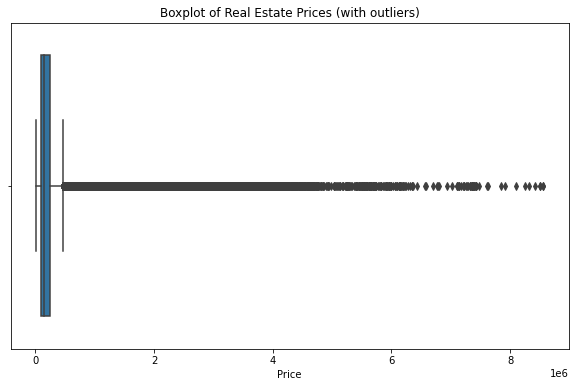

In [23]:
# Plotting the boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_long['Price'])
plt.title('Boxplot of Real Estate Prices (with outliers)')
plt.xlabel('Price')
plt.show()

Based on the presence of whiskers in the box plot, we can confirm that there are outliers in the data set. While the outliers might not be extremely far from the rest of the data, their existence indicates that some real estate prices deviate considerably from the middle 50% range.

The whiskers in the box plot extend beyond the box, indicating the presence of data points outside the interquartile range.

The boxplots indicates there are outliers present but we cant drop them because they are actual events recorded

The next step is to investigate Outliers to Identify and investigate these outliers to understand the characteristics of these high-priced properties. Determine if they should be included or excluded from further analysis based on their impact on the results.

In [24]:
#Checking for Outliers using IQR

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_long['Price'].quantile(0.25)
Q3 = df_long['Price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier cutoff
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_long[(df_long['Price'] < lower_bound) | (df_long['Price'] > upper_bound)]

# Print the number of outliers and some examples
print(f"Number of outliers: {len(outliers)}")
outliers.head()

Number of outliers: 258901


RegionID  Zipcode            City State  \
Date                                               
1996-04     97691    94301       Palo Alto    CA   
1996-04     72442    33139     Miami Beach    FL   
1996-04     97571    94117   San Francisco    CA   
1996-04     96050    90069  West Hollywood    CA   
1996-04     96086    90210   Beverly Hills    CA   

                                  Metro     CountyName  SizeRank  \
Date                                                               
1996-04                        San Jose    Santa Clara      5739   
1996-04           Miami-Fort Lauderdale     Miami-Dade        85   
1996-04                   San Francisco  San Francisco       897   
1996-04  Los Angeles-Long Beach-Anaheim    Los Angeles      1897   
1996-04  Los Angeles-Long Beach-Anaheim    Los Angeles      4817   

         Annualized_ROI      Price  
Date                                
1996-04        8.956091   709500.0  
1996-04        8.408513   480200.0  
1996-04        8.346852   481000.0  
1996-04        8.283683   533600.0  
1996-04        8.244182  1015400.0

## EDA
Next, we will performing Exploratory Data Analysis (EDA) to uncover patterns, trends, and relationships within the dataset, using:

Univeriate analysis

Bivariate analysis

The following visualizations present key insights into the most frequent entries across counties, states, and cities in the dataset. Using horizontal and vertical bar charts, these graphs are designed to reveal the distribution and prominence of different geographical areas, providing a clear comparative view of the top 10 entries in each category.

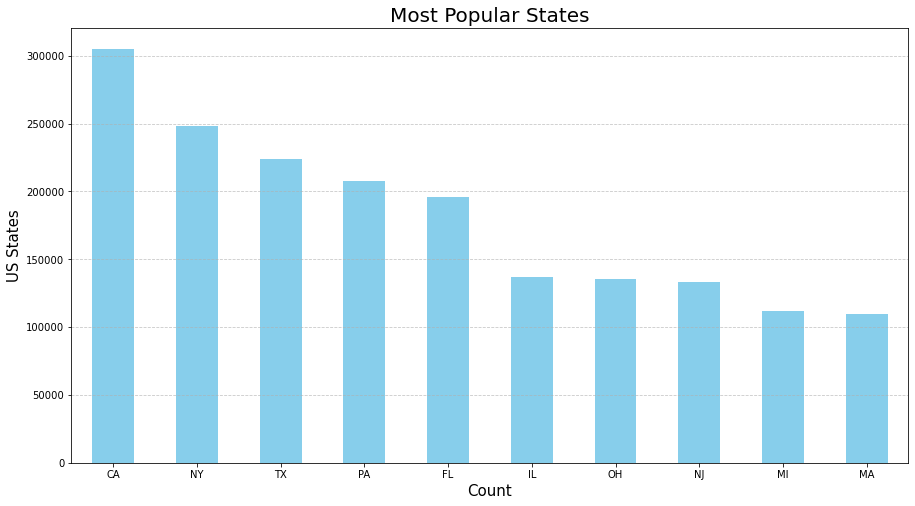

In [26]:
# Create a new figure with dimensions 15x8 inches
plt.figure(figsize=(15, 8))

# Plot a vertical bar chart showing the top 10 most frequent states
df_long['State'].value_counts().nlargest(10).plot(kind="bar", color='skyblue')

# Label the x-axis as "Count"
plt.xlabel("Count", fontsize=15)

# Label the y-axis as "US States"
plt.ylabel("US States", fontsize=15)

# Set x-axis tick labels to be horizontal
plt.xticks(rotation=0)

# Set the plot title as "Most Popular States"
plt.title("Most Popular States", fontsize=20)

# Add a grid to the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

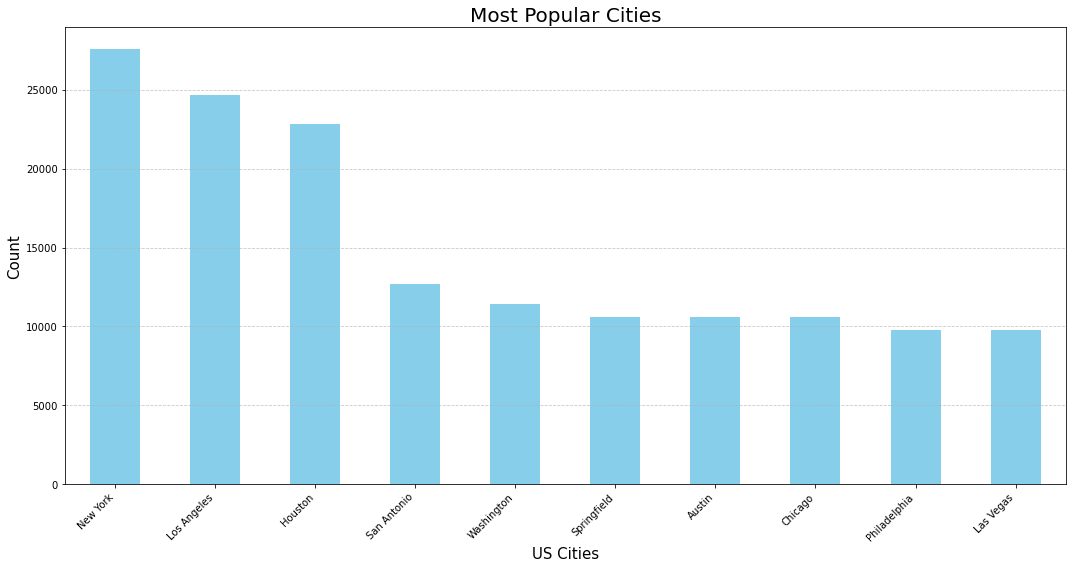

In [27]:
# Create a new figure with dimensions 15x8 inches
plt.figure(figsize=(15, 8))

# Plot a vertical bar chart showing the top 10 most frequent cities
df_long['City'].value_counts().nlargest(10).plot(kind="bar", color='skyblue')

# Label the x-axis as "US Cities"
plt.xlabel("US Cities", fontsize=15)

# Label the y-axis as "Count"
plt.ylabel("Count", fontsize=15)

# Rotate x-axis labels by 45 degrees for better readability and align them to the right
plt.xticks(rotation=45, ha='right')

# Set the plot title as "Most Popular Cities"
plt.title("Most Popular Cities", fontsize=20)

# Add a grid to the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()


The horizontal bar chart shows the top 10 counties with the highest entry counts, while the vertical bar charts display the top 10 states and cities by frequency. These charts reveal which counties, states, and cities are most commonly represented in the dataset, with labels and grid lines added for clarity and readability.

## Univariate Analysis

### Price Over Time

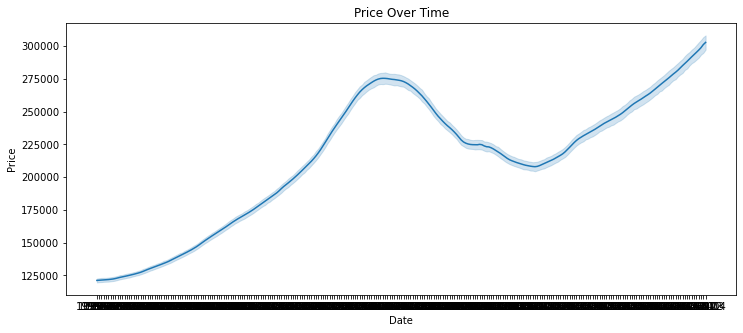

In [28]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_long, x='Date', y='Price')
plt.title('Price Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

The graph shows a time series line plot with a shaded area representing uncertainty or variability. It displays a rising trend followed by a peak, a decline, a slight dip, and then another rise, indicating cyclical behavior or responses to certain conditions. The shaded area suggests the level of confidence or variability in the data over time.

### Rolling Average Prices

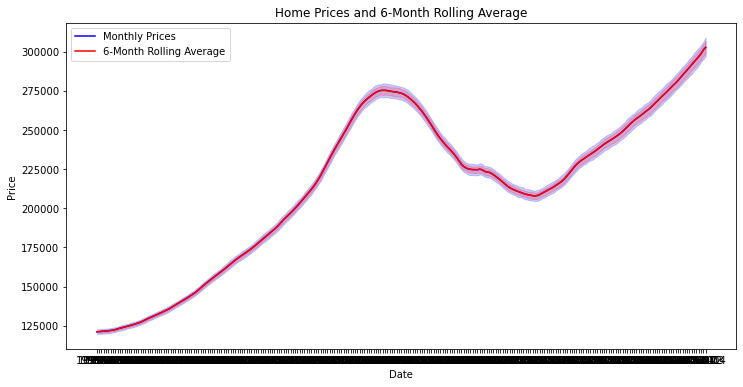

In [29]:
df_long['Rolling_Avg'] = df_long['Price'].rolling(window=6).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Date', y='Price', label='Monthly Prices', color='blue')
sns.lineplot(data=df_long, x='Date', y='Rolling_Avg', label='6-Month Rolling Average', color='red')
plt.title('Home Prices and 6-Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The graph shows two lines representing different data series over time: 

1. **Monthly Prices (Blue Line)**: This line represents the actual data points for prices on a monthly basis. The fluctuations and trends in this line reflect the monthly changes in prices.

2. **6-Month Rolling Average (Red Line)**: This line smooths the monthly prices by averaging them over a six-month period, providing a clearer view of longer-term trends by reducing short-term volatility.

The shaded area around each line likely indicates the variability or confidence intervals for those data points. The rolling average helps to highlight underlying trends by filtering out noise from the monthly data. Overall, the graph demonstrates how prices have fluctuated over time, with the rolling average providing a more stable representation of these changes.

### Mean Home Value by Metro

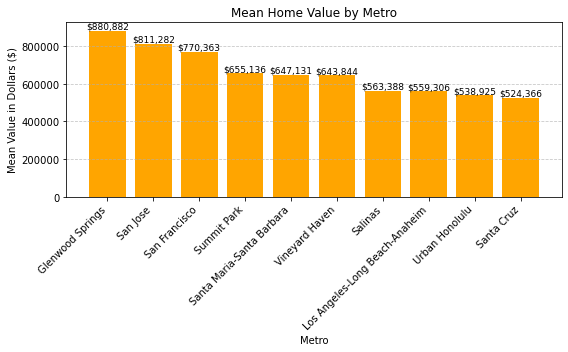

In [31]:
# Grouping the data by 'Metro' and calculating the mean 'Price' for each metro area
metro_mean_values = df_long.groupby('Metro')['Price'].mean()

# Sorting the metro areas by mean price in descending order and selecting the top 10
top_10_metros = metro_mean_values.sort_values(ascending=False).head(10)

# Converting the Series to a DataFrame and resetting the index for better handling
top_10_metros_df = top_10_metros.reset_index()

# Setting a smaller figure size for the plot
plt.figure(figsize=(8, 5))

# Creating a bar graph to visualize the mean home values by metro area, with bars colored orange
plt.bar(top_10_metros_df['Metro'], top_10_metros_df['Price'], color='orange')

# Adding annotations for each bar for clarity
for i in range(len(top_10_metros_df)):
    plt.text(i, top_10_metros_df['Price'][i], 
             f"${top_10_metros_df['Price'][i]:,.0f}", 
             ha='center', va='bottom', fontsize=9)

# Adding the title and labels
plt.title('Mean Home Value by Metro')
plt.xlabel('Metro')
plt.ylabel('Mean Value in Dollars ($)')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

Thebar chart shows the top 10 metropolitan areas with the highest mean home values. It helps in comparing the average home values across different metro areas and identify where the highest values are concentrated.

### Mean Home Value by County

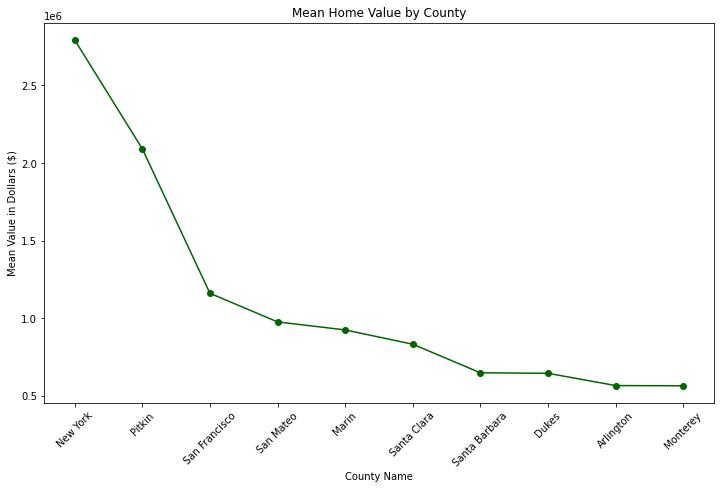

In [42]:
# Calculate mean home values by county and get the top 10
county_mean_values = df_long.groupby('CountyName')['Price'].mean()
top_10_counties = county_mean_values.sort_values(ascending=False).head(10)

# Convert index and values to lists
counties_list = top_10_counties.index.tolist()
values_list = top_10_counties.values.tolist()

# Plotting the mean home values by county using a line plot
plt.figure(figsize=(12, 7))
plt.plot(counties_list, values_list, marker='o', color='darkgreen')

# Setting the title and labels for the plot
plt.title('Mean Home Value by County')
plt.xlabel('County Name')
plt.ylabel('Mean Value in Dollars ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()



- **Decreasing Trend**: The chart shows a consistently decreasing trend, suggesting that whatever is being measured is reducing over time or across categories.
- **Points of Interest**: Certain points might stand out if the rate of decrease is more pronounced, or if there is a leveling off at the end.

### Top 10 ZIP Codes by Mean ROI

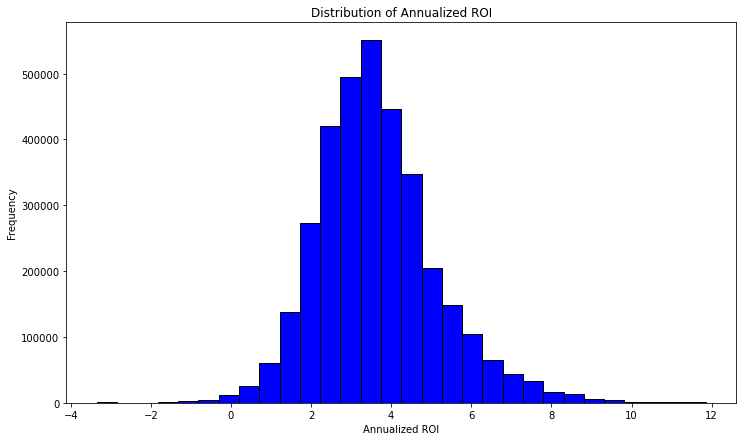

In [44]:
# Plotting the distribution of Annualized ROI values across all ZIP codes
plt.figure(figsize=(12, 7))

# Create histogram
plt.hist(df_long['Annualized_ROI'], bins=30, color='blue', edgecolor='black')

# Setting the title and labels for the plot
plt.title('Distribution of Annualized ROI')
plt.xlabel('Annualized ROI')
plt.ylabel('Frequency')

# Display the plot
plt.show()

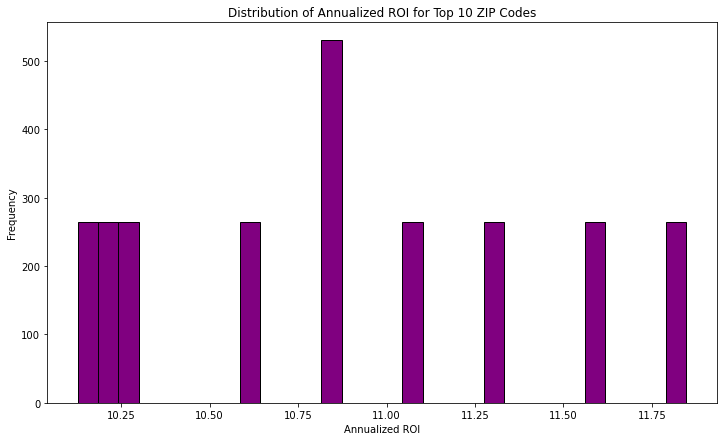

In [45]:
# Calculate mean ROI by ZIP code and get the top 10
zipcode_mean_roi = df_long.groupby('Zipcode')['Annualized_ROI'].mean()
top_10_zipcodes = zipcode_mean_roi.sort_values(ascending=False).head(10).index

# Filter the original DataFrame to include only these top 10 ZIP codes
filtered_df = df_long[df_long['Zipcode'].isin(top_10_zipcodes)]

# Plotting the distribution of Annualized ROI for top 10 ZIP codes
plt.figure(figsize=(12, 7))

# Create histogram
plt.hist(filtered_df['Annualized_ROI'], bins=30, color='purple', edgecolor='black')

# Setting the title and labels for the plot
plt.title('Distribution of Annualized ROI for Top 10 ZIP Codes')
plt.xlabel('Annualized ROI')
plt.ylabel('Frequency')

# Display the plot
plt.show()


This bar chart provides a visual comparison of values across multiple categories, with the height of each bar indicating the value associated with each category. Without specific labels for the axes or a title, it's challenging to provide a precise interpretation. Additional context or labels for the axes would allow for a more detailed and accurate analysis.

### Distribution of House Prices by Zipcode

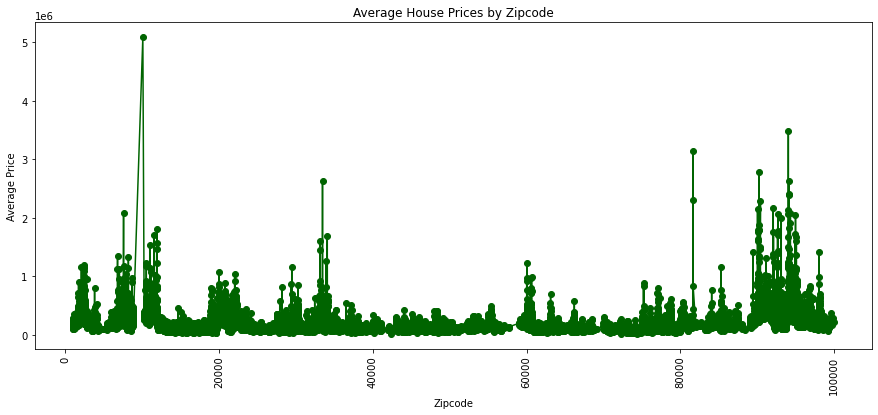

In [47]:
import matplotlib.pyplot as plt

# Calculate average house price by ZIP code
zipcode_mean_price = df_long.groupby('Zipcode')['Price'].mean().sort_index()

# Convert index and values to lists
zipcodes_list = zipcode_mean_price.index.tolist()
mean_prices_list = zipcode_mean_price.values.tolist()

# Plotting the average house prices by ZIP code using a line plot
plt.figure(figsize=(15, 6))
plt.plot(zipcodes_list, mean_prices_list, marker='o', color='darkgreen')

# Setting the title and labels for the plot
plt.title('Average House Prices by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

**Interpretation:**

1. **High-Density Clusters:**
   - The scatter plot reveals several regions along the X-axis (average price) where data points are densely clustered. This clustering suggests that multiple ZIP codes have similar average prices.
   - Notably, there are clusters with lower average prices and fewer clusters with higher average prices, indicating variations in price density across different ZIP codes.

2. **Peaks:**
   - The plot features distinct vertical lines (peaks) corresponding to specific average prices shared by multiple ZIP codes. These peaks highlight average prices that are more common among various ZIP codes.
   - For example, certain average prices, such as $300,000, appear frequently across several ZIP codes, indicating a common price point in the market.

3. **Sparse Areas:**
   - There are regions on the plot with few or no data points, suggesting that certain average prices are less common among the ZIP codes.
   - This sparsity might imply that either these price ranges are less prevalent in the housing market or that specific ZIP codes have unique pricing structures.

4. **Price Distribution:**
   - The distribution of prices varies significantly across ZIP codes. Higher peaks indicate that certain average prices are more prevalent, while other prices are less common.
   - This variation in distribution provides insights into the pricing trends across different ZIP codes.

**Hypothetical Examples:**

- **Real Estate Analysis:**
  - This scatter plot can assist in understanding which ZIP codes have similar housing markets. For instance, clusters of similar average prices can reveal areas with comparable property values.
  - The peaks can identify standard pricing bands within the market, suggesting common price points among multiple ZIP codes.


## Bivariate Analysis
### Price vs. SizeRank

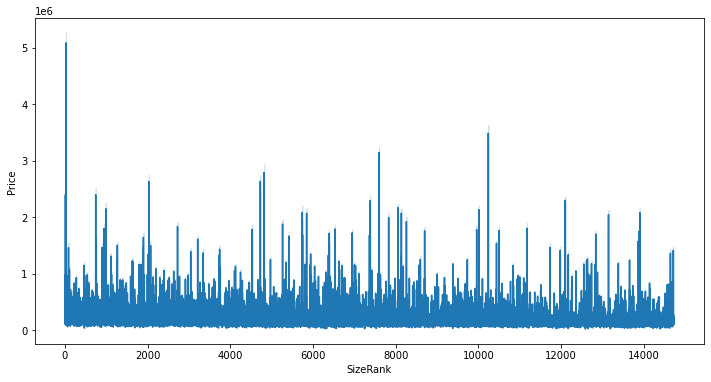

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='SizeRank', y='Price')
plt.xlabel('SizeRank')
plt.ylabel('Price')
plt.show()


**Distribution and Trends:** The plot shows a large number of data points with prices fluctuating across different size ranks. There are noticeable peaks in certain areas, which might indicate properties with significantly higher prices at specific size ranks.

**Variability:** The plot demonstrates high variability in property prices, suggesting that factors other than size significantly influence property prices. This could include location, property features, market conditions, and more.

### SizeRank Over Time

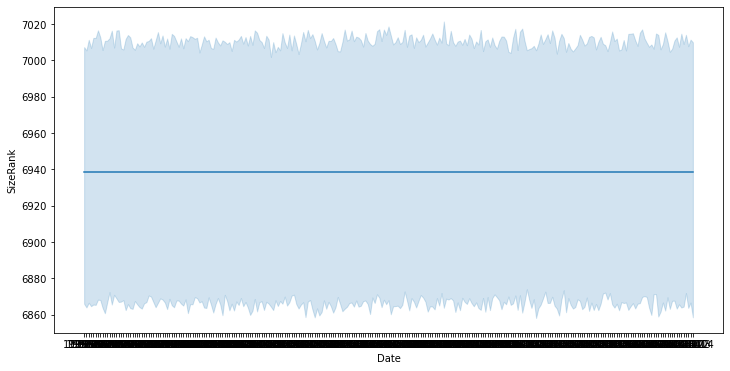

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Date', y='SizeRank')
plt.xlabel('Date')
plt.ylabel('SizeRank')
plt.show()


This plot shows how SizeRank changes over time. It helps in understanding if the popularity or ranking of ZIP codes changes and how that might relate to home prices or other factors over time.

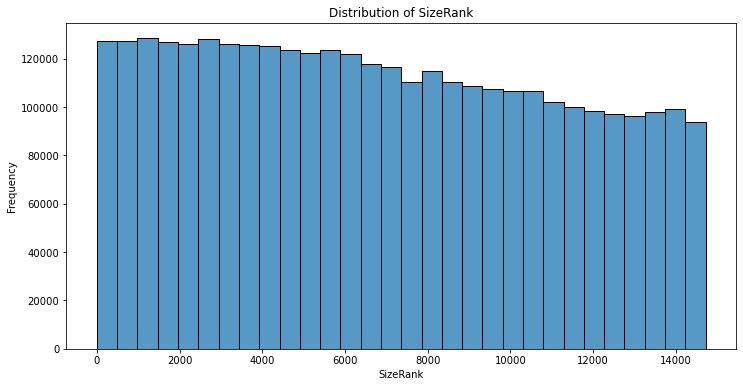

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'SizeRank' column is numeric
df_long['SizeRank'] = pd.to_numeric(df_long['SizeRank'], errors='coerce')

# Drop any rows where 'SizeRank' could not be converted to numeric (NaN values)
df_long = df_long.dropna(subset=['SizeRank'])

# Histogram of SizeRank Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_long['SizeRank'], bins=30)
plt.xlabel('SizeRank')
plt.ylabel('Frequency')
plt.title('Distribution of SizeRank')
plt.show()


**Distribution Shape:** The histogram shows a decreasing trend from left to right, with the highest frequency on the left side. This suggests that lower `SizeRank` values (which might indicate smaller or less desirable properties, depending on the dataset’s context) are more common in the dataset.

**Height of Bars:** Each bar’s height corresponds to the number of observations (or properties) that fall into each `SizeRank` bin. Taller bars indicate more properties with similar `SizeRank` values.

**KDE Curve:** The histogram appears to have an overlaid Kernel Density Estimate (KDE) curve, which smooths the histogram into a continuous probability density function. This curve helps to visualize the distribution's general shape and density.

### Summary
The histogram indicates a right-skewed distribution, where most properties have lower `SizeRank` values, and fewer properties have higher `SizeRank` values. This could imply that smaller or less desirable properties are more prevalent in the dataset.
